## Imports

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.src.callbacks import EarlyStopping

## Load Dataset

In [3]:
dataset_path = "./Boston.csv"

In [4]:
df = pd.read_csv(dataset_path)

## EDA

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
corr_matrix = df.corr()

In [9]:
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


<Axes: >

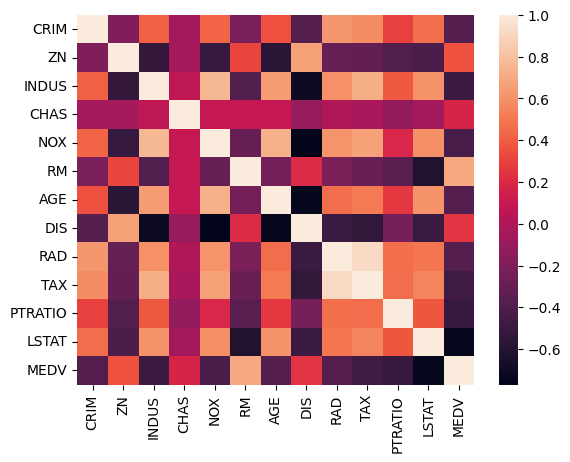

In [10]:
sns.heatmap(corr_matrix)

## Preprocessing

In [11]:
target_column = "MEDV"

In [12]:
x = df.drop(columns=[target_column])

In [13]:
y = df[[target_column]]

In [14]:
x.shape, y.shape

((506, 12), (506, 1))

In [15]:
min_max_scaler = MinMaxScaler()

In [16]:
x_normalized = pd.DataFrame(min_max_scaler.fit_transform(x), columns = x.columns)

In [17]:
x_normalized.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,0.099338


In [18]:
x_normalized.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.301409
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.197049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.144040
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.265728
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.420116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized,y, test_size = 0.2)

In [20]:
x_train.shape, y_train.shape

((404, 12), (404, 1))

## Train Model

### Linear Regression

In [21]:
lr_model = LinearRegression()

In [22]:
lr_model.fit(x_train, y_train)

LinearRegression()

### Neural Network

In [23]:
features = x_train.columns

In [24]:
feature_cnt = len(features)

In [25]:
input_shape = (feature_cnt,)

In [26]:
nn_model = Sequential([
    Input(shape = input_shape), 
    # Dense(units=32, activation = 'relu'),
    # Dense(units=32, activation = 'relu'),
    Dense(units = 1, activation = 'linear'),
])

In [27]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
learning_rate = 0.01
optimizer = Adam(learning_rate = learning_rate)
loss = MeanSquaredError();
metrics = [loss]

In [29]:
nn_model.compile(optimizer = optimizer, loss = loss, metrics = metrics)

In [30]:
epochs = 2000
batch_size = 1000
validation_split = 0.1
early_stopping = EarlyStopping(patience = 5 , monitor = 'val_mean_squared_error', restore_best_weights = True)

In [ ]:
history = nn_model.fit(x = x_train, y = y_train , epochs = epochs, batch_size = batch_size, validation_split = validation_split, callbacks = [])

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 587.1700 - mean_squared_error: 587.1700 - val_loss: 571.3806 - val_mean_squared_error: 571.3806
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 584.9902 - mean_squared_error: 584.9902 - val_loss: 569.1725 - val_mean_squared_error: 569.1725
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - loss: 582.8161 - mean_squared_error: 582.8161 - val_loss: 566.9707 - val_mean_squared_error: 566.9707
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 580.6479 - mean_squared_error: 580.6479 - val_loss: 564.7755 - val_mean_squared_error: 564.7755
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - loss: 578.4858 - mean_squared_error: 578.4858 - val_loss: 562.5867 - val_mean_squared_error: 562.5867
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 576.3297 - mean_squared_error: 576.3297 - val_loss: 560.4045 - val_mean_squared_error: 560.4045
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - loss: 574.179

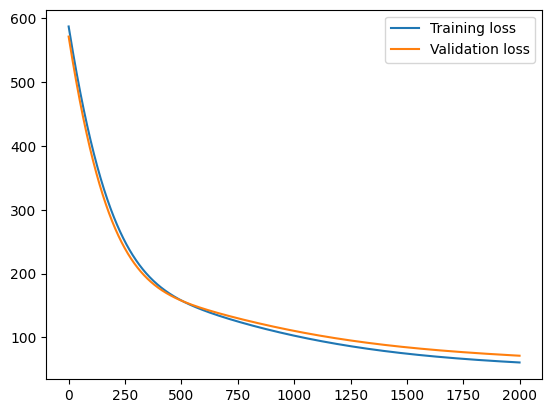

In [36]:
plt.plot(history.history['mean_squared_error'],label='Training loss')
plt.plot(history.history['val_mean_squared_error'],label='Validation loss')
plt.legend()
plt.show()

## Evaluate Model

In [37]:
y_pred = nn_model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [38]:
mse = mean_squared_error(y_test, y_pred)

In [39]:
mse

48.51900863647461